# D603 Task 1: Classification Data Mining Models (Random Forest Classification)

## A. GitLab Repository

https://gitlab.com/wgu-gitlab-environment/student-repos/smurd32/d603-machine-learning/-/tree/task-1-classification?ref_type=heads

## B. Purpose of the Data Mining Report

### B1. Proposal of Question

**Business Question:** Can we predict which patients are most likely to be readmitted within 30 days of discharge so that our hospital chain can implement targeted intervention programs to improve patient outcomes and reduce readmission penalties?

### B2. Defined Goal

**Goal:** Develop a Random Forest Classification model that identifies the most important factors influencing the prediction of patient readmission risk, enabling early identification of high-risk patients for targeted intervention programs. By identifying these factors, we can provide targeted intervention initiatives that can improve the patient experience and reduce the financial penalties from the Centers for Medicare and Medicaid Services (CMS). Freeing up that funding can go toward additional hospital resources or medical care initiatives.

## C. Justification of Classification Method

### C1. Explanation of Classification Method

Random Forest Classification works by creating multiple decision trees that each make independent predictions about patient readmission risk. Each tree is trained on a random sample of the data and uses a random subset of available features, such as age, medical conditions, and hospital stay details. The final prediction comes from combining all the individual tree votes--if most trees predict "readmitted," the patient is classified as high-risk for readmission. This ensemble approach reduces errors and provides more reliable predictions than any single decision tree.

Random Forest Classification is the ideal classification method for this medical dataset because it naturally handles the mix of categorical data (like gender and medical conditions) and continuous data (like age and income) without requiring complicated preprocessing. Most importantly for healthcare applications, it provides clear feature importance rankings that show which patient factors most strongly predict readmission risk. This interpretability allows hospital staff to understand why certain patients are high-risk and develop targeted intervention programs.

The expected outcomes include accurate binary predictions (readmitted versus not readmitted), probability scores for risk assessment, and actionable insights about which patient characteristics to monitor most closely.


### C2. Packages & Libraries List

The follow packages and libraries were chosen to complete the Random Forest Classification:

- `pandas`: Allows data manipulation and analysis.
- `numpy`: Provides numerical computations.
- `re`: RegEx package allows easy renaming of variables for consistency.
- `RandomForestClassifier` from Scikit-Learn: Acts as the main classification algorithm.
- `train_test_split` from Scikit-Learn: Provides data splits for training and testing to prevent overfitting.
- `GridSearchCV` from Scikit-Learn: Finds optimal hyperparameters automatically using cross-validation.
- `StratifiedKFold` from Scikit-Learn: A cross-validation technique used to split a dataset into training and testing sets, specifically designed to handle similar proportions of samples from each class as the original dataset.
- `cross_val_score` from Scikit-Learn: Provides a more robust performance estimation than single train/test split.
- `accuracy_score` from Scikit-Learn: Provides overall correctness but can be misleading if classes are imbalanced.
- `precision_score` from Scikit-Learn: Reduces false alarms, important for resource allocation.
- `recall_score` from Scikit-Learn: Measures how good the model is at finding all positive cases that actually exist.
- `f1_score` from Scikit-Learn: Balances precision and recall.
- `roc_auc_score` from Scikit-Learn: Determines how well the model distinguishes between readmitted and non-readmitted patients.
- `confusion_matrix` from Scikit-Learn: Provides detailed breakdown of prediction errors.
- `classification_report` from Scikit-Learn: Single function that provides all performance metrics.
- `matplotlib`: Visualizations
- `seaborn`: Statistical visualizations

In [1]:
# Core packages and libraries
import pandas as pd
import numpy as np
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## D. Data Preparation

### D1. Data Preprocessing

**Data Preprocessing Goal:** Convert categorical variables to numerical format to create compatibility with Random Forest algorithm requirements.

Random Forest Classification requires all input features to be in numerical format, but the `medical_clean.csv` dataset contains several categorical variables such as Gender (Male/Female/Nonbinary), Marital Status (Divorced/Married/Widowed), and several binary medical conditions (Yes/No) for high blood pressure, stroke, diabetes, etc.

To address this requirement, I use mapping and pandas’ `get_dummies()` to transform these text-based categorical variables into numeric representations and Boolean values. For example, I will use mapping to replace the 'Yes' and 'No' to '1' and '0' for any binary categories, and `get_dummies()` will be used to encode nominal categories into Boolean values, which can be accepted implicitly by Random Forest Classification as numeric values.

This preprocessing step is essential because Random Forest's underlying decision tree algorithm can only process numerical data when making splits and calculating feature importance scores. By encoding categorical variables appropriately, it is ensured that the Random Forest model can effectively utilize all available patient information to make accurate readmission predictions while maintaining the interpretability of results.


### D2. Dataset Variables

Below are the initial dataset variables retained for the Random Forest Classification analysis to predict patient readmission status:

#### Target Variable:

- `ReAdmis`: Patient readmitted within 30 days (Yes/No); Categorical (Binary)

#### Predictor Variables:

**Patient Demographics:**
- `Age`: Patient age in years; Continuous
- `Gender`: Patient gender (Male/Female/Nonbinary); Categorial
- `Income`: Annual income of patient; Continuous
- `Marital`: Marital status of patient (Single/Married/Divorced/Widowed/Never Married); Categorical
- `Area`: Area type (Rural/Suburban/Urban); Categorical

**Clinical Measurements:**
- `VitD_levels`: Vitamin D levels (ng/mL); Continuous
- `Initial_days`: Length of initial hospital stays (days); Continuous

**Medical Conditions (Binary Yes/No):**
- `HighBlood`: High blood pressure diagnosis; Categorical (Binary)
- `Stroke`: Previous stroke history; Categorical (Binary)
- `Overweight`: Patient considered overweight; Categorical (Binary)
- `Arthritis`: Arthritis diagnosis; Categorical (Binary)
- `Diabetes`: Diabetes diagnosis; Categorical (Binary)
- `BackPain`: Chronic back pain diagnosis; Categorical (Binary)
- `Anxiety`: Anxiety disorder diagnosis; Categorical (Binary)
- `Asthma`: Asthma diagnosis; Categorical (Binary)

**Operational Factors:**
- `Initial_admin`: Type of admission (Emergency/Elective/Observation); Categorical
- `Services`: Primary service received (Blood work/IV/CT scan/MRI); Categorical
- `Complication_risk`: Patient complication risk level (High/Medium/Low); Categorical (Ordinal)
- `Soft_drink`: Habitually drinks 3+ sodas daily (Yes/No); Categorical (Binary)

**Financial Variables**
- `TotalCharge`: Average daily charge amount; Continuous
- `Additional_charges`: Average additional charges; Continuous

Summary of feature variables: 15 categorical variables; 6 continuous variables

### D3. Steps for Analysis

In [2]:
# Load the dataset
df = pd.read_csv('medical_clean.csv')
# Preview the dataset
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


To prepare the data for the Random Forest classification model, I used the `.read_csv()` function from `pandas` to load the CSV and convert it into a DataFrame, making it easier to analyze. The `.head()` function loads the first five observations of the DataFrame to verify it loaded correctly and provide a full preview of the data.

In [3]:
# Select relevant columns to keep
columns_to_keep = ['ReAdmis', 'Age', 'Gender', 'Income', 'Marital',
                   'Area', 'VitD_levels', 'Initial_days', 'HighBlood',
                   'Stroke', 'Overweight', 'Arthritis', 'Diabetes',
                   'BackPain', 'Anxiety', 'Asthma', 'Initial_admin',
                   'Services', 'Complication_risk', 'Soft_drink',
                   'TotalCharge', 'Additional_charges']

df = df[columns_to_keep]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ReAdmis             10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Income              10000 non-null  float64
 4   Marital             10000 non-null  object 
 5   Area                10000 non-null  object 
 6   VitD_levels         10000 non-null  float64
 7   Initial_days        10000 non-null  float64
 8   HighBlood           10000 non-null  object 
 9   Stroke              10000 non-null  object 
 10  Overweight          10000 non-null  object 
 11  Arthritis           10000 non-null  object 
 12  Diabetes            10000 non-null  object 
 13  BackPain            10000 non-null  object 
 14  Anxiety             10000 non-null  object 
 15  Asthma              10000 non-null  object 
 16  Initi

Out of the original 50 features, I chose a target variable ('ReAdmis') and 21 potential predictive variables that seemed to have the most to do with what may predict if a patient is readmitted to the hospital after discharge.

**Initial Observations:**

- There are no missing values in any of the columns.
- There is a mix of object, int64, and float64 data types.
- There is one target variable and 21 feature variables out of the initial 50 variables.

In [4]:
# Create a function that creates a consistent snake_case style for all variable names
def to_snake_case(name):
    """
    Convert column name to snake_case format
    """
    # Handle acronyms and special cases first
    name = name.replace('VitD', 'vit_d')

    # Insert underscore before uppercase letters that follow lowercase letters
    # This handles PascalCase like 'HighBlood' -> 'High_Blood'
    name = re.sub('([a-z0-9])([A-Z])', r'\1_\2', name)

    # Convert to lowercase
    name = name.lower()

    # Clean up any multiple underscores
    name = re.sub('_+', '_', name)

    # Remove leading/trailing underscores
    name = name.strip('_')

    # Remove any spaces
    name = name.replace(' ', '_')

    return name

# Apply snake_case conversion to all column names
df.columns = [to_snake_case(col) for col in df.columns]
# print out new info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   re_admis            10000 non-null  object 
 1   age                 10000 non-null  int64  
 2   gender              10000 non-null  object 
 3   income              10000 non-null  float64
 4   marital             10000 non-null  object 
 5   area                10000 non-null  object 
 6   vit_d_levels        10000 non-null  float64
 7   initial_days        10000 non-null  float64
 8   high_blood          10000 non-null  object 
 9   stroke              10000 non-null  object 
 10  overweight          10000 non-null  object 
 11  arthritis           10000 non-null  object 
 12  diabetes            10000 non-null  object 
 13  back_pain           10000 non-null  object 
 14  anxiety             10000 non-null  object 
 15  asthma              10000 non-null  object 
 16  initi

I found the inconsistency of the column names (despite being a "cleaned" dataset) to be difficult to work with, so I created a function that uses regular expressions to fix the column names and convert them all from a mix of snake case, Pascal case, and other miscellaneous cases to a consistent use of snake_case.

In [5]:
# Encode binary variables that contain "Yes"/"No" values to 1/0
binary_vars = ['re_admis', 'high_blood', 'stroke', 'overweight',
               'arthritis', 'diabetes', 'back_pain', 'anxiety',
               'asthma', 'soft_drink']

for var in binary_vars:
    df[var] = df[var].map({'Yes': 1, 'No': 0})

In [6]:
# Encode ordinal variables that contain ordered categories
risk_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['complication_risk'] = df['complication_risk'].map(risk_mapping)

In [7]:
# Encode nominal variables using Label Encoding
# Codecademy (n.d.) - Encoding Categorical Variables
nominal_vars = ['gender', 'marital', 'area', 'initial_admin', 'services']
df = pd.get_dummies(df, columns=nominal_vars, drop_first=True)

I separated out the binary, ordinal, and nominal categorical variables and encoded them with a mix of mapping and `pd.get_dummies()`.

Using DataFrame mapping, I was able to quickly convert binary "Yes" values to `1` and "No" values to `0` and create an order for the `complication_risk` values. I used pandas' `pd.get_dummies()` to one-hot encode the nominal variables in a way that does not assign meaning to the order and this generated new features. I left the Boolean values as `bool` types as Random Forest Classification can take `bool` values without further preprocessing into explicit numeric values.

In [8]:
df.head()

,re_admis,age,income,vit_d_levels,initial_days,high_blood,stroke,overweight,arthritis,diabetes,back_pain,anxiety,asthma,complication_risk,soft_drink,total_charge,additional_charges,gender_Male,gender_Nonbinary,marital_Married,marital_Never Married,marital_Separated,marital_Widowed,area_Suburban,area_Urban,initial_admin_Emergency Admission,initial_admin_Observation Admission,services_CT Scan,services_Intravenous,services_MRI
0,0,53,86575.93,19.141466,10.585770,1,0,0,1,1,1,1,1,1,0,3726.702860,17939.403420,True,False,False,False,False,False,True,False,True,False,False,False,False
1,0,51,46805.99,18.940352,15.129562,1,0,1,0,0,0,0,0,2,0,4193.190458,17612.998120,False,False,True,False,False,False,False,True,True,False,False,True,False
2,0,53,14370.14,18.057507,4.772177,1,0,1,0,1,0,0,0,1,0,2434.234222,17505.192460,False,False,False,False,False,True,True,False,False,False,False,False,False
3,0,78,39741.49,16.576858,1.714879,0,1,0,1,0,0,0,1,1,0,2127.830423,12993.437350,True,False,True,False,False,False,True,False,False,False,False,False,False
4,0,22,1209.56,17.439069,1.254807,0,0,0,0,0,0,0,0,0,1,2113.073274,3716.525786,False,False,False,False,False,True,False,False,False,False,True,False,False


In [9]:
# Apply snake_case conversion to all column names
df.columns = [to_snake_case(col) for col in df.columns]
# print out new info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   re_admis                             10000 non-null  int64  
 1   age                                  10000 non-null  int64  
 2   income                               10000 non-null  float64
 3   vit_d_levels                         10000 non-null  float64
 4   initial_days                         10000 non-null  float64
 5   high_blood                           10000 non-null  int64  
 6   stroke                               10000 non-null  int64  
 7   overweight                           10000 non-null  int64  
 8   arthritis                            10000 non-null  int64  
 9   diabetes                             10000 non-null  int64  
 10  back_pain                            10000 non-null  int64  
 11  anxiety                      

**Observations:**

- There are no longer any "object" types. All data has been converted to int64, float64, or Boolean as appropriate.

### D4. Cleaned Dataset

In [10]:
# Provide a copy of the cleaned dataset
df.to_csv("cleaned_medical_dataset.csv", index=False)

## E. Perform Data Analysis

### E1. Splitting the Data

In [11]:
# Separate the features (X) from the target variable (y)
X = df.drop('re_admis', axis=1)
y = df['re_admis']

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Target distribution:\n{y.value_counts()}")

Feature matrix shape: (10000, 29)
Target vector shape: (10000,)
Target distribution:
re_admis
0    6331
1    3669
Name: count, dtype: int64


In [12]:
# First split: 70% training data, 30% temporary data (for validation + test)
# (Codecademy, n.d.) - Training, Validation and Test Dataset
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3, # 30% will be split equally into validation and test data
    random_state=42,
    stratify=y # maintain class distribution across splits
)

In [13]:
# Second split: Split the 30% temp data into 15% validation and 15% test data
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5, # split original 30% in half
    random_state=42,
    stratify=y_temp # maintain class distribution across splits
)

In [14]:
# Verify the splits are correct
total_samples = len(df)
print(f"\nDataset split verification:")
print(f"Total samples: {total_samples}")
print(f"Training set: {len(X_train)} samples ({len(X_train)/total_samples:.1%})")
print(f"Validation set: {len(X_val)} samples ({len(X_val)/total_samples:.1%})")
print(f"Test set: {len(X_test)} samples ({len(X_test)/total_samples:.1%})")


Dataset split verification:
Total samples: 10000
Training set: 7000 samples (70.0%)
Validation set: 1500 samples (15.0%)
Test set: 1500 samples (15.0%)


In [15]:
# Verify class distribution is maintained across splits
print(f"\nClass distribution verification:")
print(f"Original: {y.value_counts(normalize=True).sort_index()}")
print(f"Training: {y_train.value_counts(normalize=True).sort_index()}")
print(f"Validation: {y_val.value_counts(normalize=True).sort_index()}")
print(f"Test: {y_test.value_counts(normalize=True).sort_index()}")


Class distribution verification:
Original: re_admis
0    0.6331
1    0.3669
Name: proportion, dtype: float64
Training: re_admis
0    0.633143
1    0.366857
Name: proportion, dtype: float64
Validation: re_admis
0    0.632667
1    0.367333
Name: proportion, dtype: float64
Test: re_admis
0    0.633333
1    0.366667
Name: proportion, dtype: float64


In [16]:
# Save the split datasets to separate files
# Training set
train_data = pd.concat([X_train, y_train], axis=1)
train_data.to_csv("training_dataset.csv", index=False)

# Validation set
val_data = pd.concat([X_val, y_val], axis=1)
val_data.to_csv("validation_dataset.csv", index=False)

# Test set
test_data = pd.concat([X_test, y_test], axis=1)
test_data.to_csv("test_dataset.csv", index=False)

### E2. Initial Model Creation

In [17]:
# Create initial Random Forest model using the TRAINING dataset and default
# parameters
rf_initial = RandomForestClassifier(random_state=42, n_jobs=-1)

print(f"Initial Random Forest Parameters:")
print(f"- n_estimators: {rf_initial.n_estimators}")
print(f"- max_depth: {rf_initial.max_depth}")
print(f"- min_samples_split: {rf_initial.min_samples_split}")
print(f"- min_samples_leaf: {rf_initial.min_samples_leaf}")
print(f"- max_features: {rf_initial.max_features}")
print(f"- bootstrap: {rf_initial.bootstrap}")

Initial Random Forest Parameters:
- n_estimators: 100
- max_depth: None
- min_samples_split: 2
- min_samples_leaf: 1
- max_features: sqrt
- bootstrap: True


In [18]:
# Train the model on the training data
rf_initial.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = rf_initial.predict(X_train)
y_train_proba = rf_initial.predict_proba(X_train)[:, 1] # Probabilities for positive class

In [19]:
# Calculate and print all required metrics
# 1. Accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy: {accuracy:.4f} ({accuracy:.1%})")

# 2. Precision
precision = precision_score(y_train, y_train_pred)
print(f"Precision: {precision:.4f} ({precision:.1%})")

# 3. Recall
recall = recall_score(y_train, y_train_pred)
print(f"Recall: {recall:.4f} ({recall:.1%})")

# 4. F1 Score
f1 = f1_score(y_train, y_train_pred)
print(f"F1 Score: {f1:.4f} ({f1:.1%})")

# 5. AUC-ROC
auc_roc = roc_auc_score(y_train, y_train_proba)
print(f"AUC-ROC: {auc_roc:.4f} ({auc_roc:.1%})")

# 6. Confusion Matrix
cm = confusion_matrix(y_train, y_train_pred)
print(f"\nConfusion Matrix:")
print(f"                 Predicted")
print(f"Actual    No (0)    Yes (1)")
print(f"No (0)    {cm[0,0]:6d}    {cm[0,1]:6d}")
print(f"Yes (1)   {cm[1,0]:6d}    {cm[1,1]:6d}")

Accuracy: 1.0000 (100.0%)
Precision: 1.0000 (100.0%)
Recall: 1.0000 (100.0%)
F1 Score: 1.0000 (100.0%)
AUC-ROC: 1.0000 (100.0%)

Confusion Matrix:
                 Predicted
Actual    No (0)    Yes (1)
No (0)      4432         0
Yes (1)        0      2568


In [20]:
# Additional detailed breakdown
tn, fp, fn, tp = cm.ravel()
print(f"\nDetailed Breakdown:")
print(f"True Negatives (TN):  {tn:,}")
print(f"False Positives (FP): {fp:,}")
print(f"False Negatives (FN): {fn:,}")
print(f"True Positives (TP):  {tp:,}")

# Comprehensive Classification Report
print(f"\nClassification Report:")
print(classification_report(y_train, y_train_pred,
                            target_names=["Not Readmitted", "Readmitted"]))


Detailed Breakdown:
True Negatives (TN):  4,432
False Positives (FP): 0
False Negatives (FN): 0
True Positives (TP):  2,568

Classification Report:
                precision    recall  f1-score   support

Not Readmitted       1.00      1.00      1.00      4432
    Readmitted       1.00      1.00      1.00      2568

      accuracy                           1.00      7000
     macro avg       1.00      1.00      1.00      7000
  weighted avg       1.00      1.00      1.00      7000



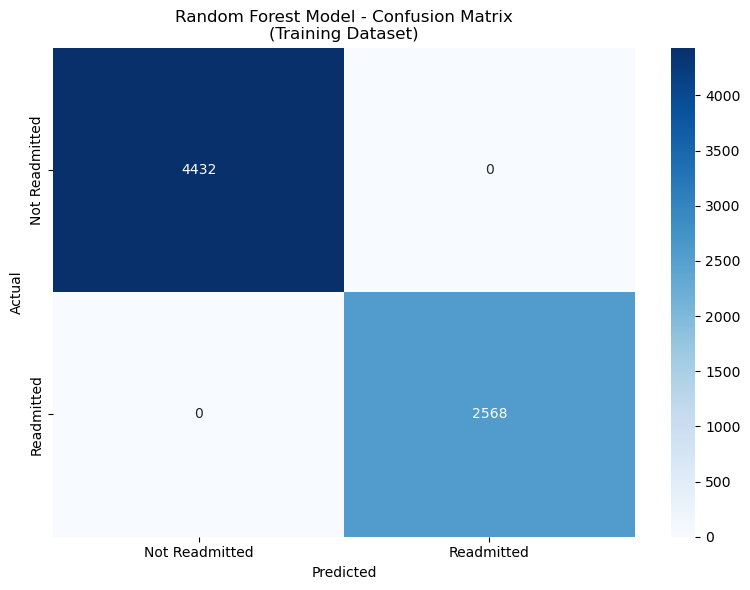

In [21]:
# Visualize confusion matrix for TRAINING data
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Readmitted', 'Readmitted'],
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.title('Random Forest Model - Confusion Matrix\n(Training Dataset)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### E3. Hyperparameter Tuning

**Hyperparameters Selected for Tuning:**

1. `n_estimators`: Number of trees in the forest
  - More trees generally improve performance but increase computation time
  - Testing: `[50, 100, 200]` to balance performance vs efficiency
2. `max_depth`: Maximum depth of individual trees
  - Controls overfitting - deeper trees can memorize training data
  - Testing: `[10, None]` to find optimal complexity
3. `min_samples_split`: Minimum samples required to split internal node
  - Higher values prevent overfitting by requiring more samples per split
  - Testing: `[5, 10]` from very flexible to more conservative
4. `min_samples_leaf`: Minimum samples required at leaf node
  - Controls overfitting by ensuring leaves have sufficient samples
  - Testing: `[2, 4]` to balance model complexity
5. `max_features`: Number of features considered for best split
  - Controls randomness and prevents overfitting
  - Testing: `['sqrt', 'log2']` - standard Random Forest approaches

In [22]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],   # Number of trees
    'max_depth': [10, None],          # Tree depth (None = unlimited)
    'min_samples_split': [5, 10],     # Min samples to split node
    'min_samples_leaf': [2, 4],       # Min samples in leaf
    'max_features': ['sqrt', 'log2']  # Features per tree
}

These hyperparameters were chosen because they directly control:
- Model complexity and overfitting (`max_depth`, `min_samples_split`, `min_samples_leaf`)
- Ensemble diversity and performance (`n_estimators`, `max_features`)
- Computational efficiency vs accuracy trade-offs
- Are most impactful for Random Forest performance in medical prediction

In [23]:
# Create Random Forest for hyperparameter tuning
rf_tuning = RandomForestClassifier(random_state=42, n_jobs=-1)

# Define the 5-fold cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [24]:
# Perform GridSearchCV with 5-fold cross validation
print(f"Total parameter combinations to test: {len(param_grid['n_estimators']) * len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf']) * len(param_grid['max_features'])}")

grid_search = GridSearchCV(
    estimator=rf_tuning,
    param_grid=param_grid,
    cv=cv,                   # 5-fold cross validation
    scoring='f1',            # Optimize for F1-score (balances precision/recall)
    n_jobs=-1,
    verbose=1
)

Total parameter combinations to test: 48


In [25]:
# Fit the grid search on VALIDATION data
grid_search.fit(X_val, y_val)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=1)

In [26]:
# Display best parameters
print("Best Hyperparameters:")
best_params = grid_search.best_params_
for param, value in best_params.items():
    print(f"- {param}: {value}")

print(f"\nBest Cross-Validation F1 Score: {grid_search.best_score_:.4f}")

Best Hyperparameters:
- max_depth: None
- max_features: sqrt
- min_samples_leaf: 4
- min_samples_split: 5
- n_estimators: 100

Best Cross-Validation F1 Score: 0.9756


In [27]:
# Get the best model
rf_optimized = grid_search.best_estimator_

In [28]:
# Display the top 5 parameter combinations
results_df = pd.DataFrame(grid_search.cv_results_)
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

### E4. Predictions

In [29]:
# Make predictions on TEST dataset
y_test_pred = rf_optimized.predict(X_test)
y_test_proba = rf_optimized.predict_proba(X_test)[:, 1]

In [30]:
# Calculate and print all required metrics on TEST data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc_roc = roc_auc_score(y_test, y_test_proba)

# Calculate and print all required metrics
# 1. Accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {test_accuracy:.4f} ({test_accuracy:.1%})")

# 2. Precision
test_precision = precision_score(y_test, y_test_pred)
print(f"Precision: {test_precision:.4f} ({test_precision:.1%})")

# 3. Recall
test_recall = recall_score(y_test, y_test_pred)
print(f"Recall: {test_recall:.4f} ({test_recall:.1%})")

# 4. F1 Score
test_f1 = f1_score(y_test, y_test_pred)
print(f"F1 Score: {test_f1:.4f} ({test_f1:.1%})")

# 5. AUC-ROC
test_auc_roc = roc_auc_score(y_test, y_test_proba)
print(f"AUC-ROC: {test_auc_roc:.4f} ({test_auc_roc:.1%})")

# 6. Confusion Matrix for TEST
test_cm = confusion_matrix(y_test, y_test_pred)
print(f"\nConfusion Matrix:")
print(f"                    Predicted")
print(f"Actual    No (0)   Yes (1)")
print(f"No (0)    {test_cm[0,0]:6d}    {test_cm[0,1]:6d}")
print(f"Yes (1)   {test_cm[1,0]:6d}    {test_cm[1,1]:6d}")

Accuracy: 0.9793 (97.9%)
Precision: 0.9659 (96.6%)
Recall: 0.9782 (97.8%)
F1 Score: 0.9720 (97.2%)
AUC-ROC: 0.9982 (99.8%)

Confusion Matrix:
                    Predicted
Actual    No (0)   Yes (1)
No (0)       931        19
Yes (1)       12       538


In [31]:
# Detailed breakdown
tn_test, fp_test, fn_test, tp_test = test_cm.ravel()
print(f"\nDetailed Breakdown:")
print(f"True Negatives (TN):  {tn_test:,}")
print(f"False Positives (FP): {fp_test:,}")
print(f"False Negatives (FN): {fn_test:,}")
print(f"True Positives (TP):  {tp_test:,}")


Detailed Breakdown:
True Negatives (TN):  931
False Positives (FP): 19
False Negatives (FN): 12
True Positives (TP):  538


In [32]:
print(f"\nClassification Report:")
print(classification_report(y_test, y_test_pred,
                          target_names=['Not Readmitted', 'Readmitted']))


Classification Report:
                precision    recall  f1-score   support

Not Readmitted       0.99      0.98      0.98       950
    Readmitted       0.97      0.98      0.97       550

      accuracy                           0.98      1500
     macro avg       0.98      0.98      0.98      1500
  weighted avg       0.98      0.98      0.98      1500



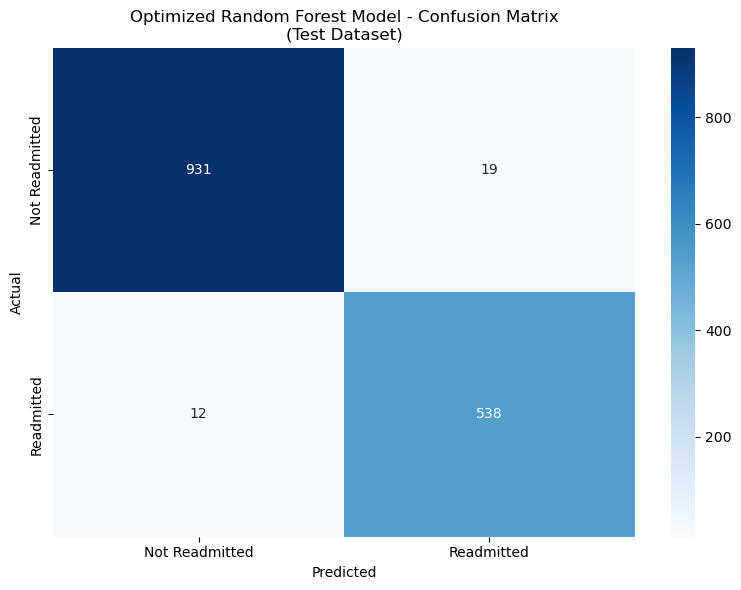

In [33]:
# Visualize confusion matrix for TEST data
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Readmitted', 'Readmitted'],
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.title('Optimized Random Forest Model - Confusion Matrix\n(Test Dataset)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [34]:
# Compare initial model (training data) vs optimized model (test data)
print(f"Initial Model (Training Dataset):")
print(f"- Accuracy: {accuracy:.4f}")
print(f"- Precision: {precision:.4f}")
print(f"- Recall: {recall:.4f}")
print(f"- F1 Score: {f1:.4f}")
print(f"- AUC-ROC: {auc_roc:.4f}")

print(f"\nOptimized Model (Test Dataset):")
print(f"- Accuracy: {test_accuracy:.4f}")
print(f"- Precision: {test_precision:.4f}")
print(f"- Recall: {test_recall:.4f}")
print(f"- F1 Score: {test_f1:.4f}")
print(f"- AUC-ROC: {test_auc_roc:.4f}")

Initial Model (Training Dataset):
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
- AUC-ROC: 1.0000

Optimized Model (Test Dataset):
- Accuracy: 0.9793
- Precision: 0.9659
- Recall: 0.9782
- F1 Score: 0.9720
- AUC-ROC: 0.9982


In [35]:
# Performance differences
print(f"\nPerformance Differences (Test vs Training):")
print(f"- Accuracy difference: {test_accuracy - accuracy:.4f}")
print(f"- Precision difference: {test_precision - precision:.4f}")
print(f"- Recall difference: {test_recall - recall:.4f}")
print(f"- F1 Score difference: {test_f1 - f1:.4f}")
print(f"- AUC-ROC difference: {test_auc_roc - auc_roc:.4f}")


Performance Differences (Test vs Training):
- Accuracy difference: -0.0207
- Precision difference: -0.0341
- Recall difference: -0.0218
- F1 Score difference: -0.0280
- AUC-ROC difference: -0.0018


#### Feature Importance

In [36]:
# Selecting most important features
importances = rf_optimized.feature_importances_

# Pair features with importance values
feature_importances = list(zip(X.columns, importances))

# Sort features by importance
feature_importances.sort(key=lambda x: x[1], reverse=True)
for feature, importance in feature_importances:
  print(f"{feature}: {importance:.4f}")

initial_days: 0.5444
total_charge: 0.3882
income: 0.0111
additional_charges: 0.0101
vit_d_levels: 0.0098
age: 0.0075
complication_risk: 0.0035
initial_admin_emergency_admission: 0.0029
initial_admin_observation_admission: 0.0018
gender_male: 0.0015
services_intravenous: 0.0014
services_ct_scan: 0.0014
area_urban: 0.0013
back_pain: 0.0012
area_suburban: 0.0012
anxiety: 0.0012
marital_never_married: 0.0012
asthma: 0.0012
arthritis: 0.0011
marital_separated: 0.0011
high_blood: 0.0011
marital_married: 0.0011
overweight: 0.0009
marital_widowed: 0.0009
soft_drink: 0.0009
services_mri: 0.0007
stroke: 0.0007
diabetes: 0.0006
gender_nonbinary: 0.0001


## F. Analysis Summary

### F1. Model Evaluation

The comparison between the initial model performance on training data and the optimized performance model on test data revealed several key insights about the Random Forest Classifier.

The initial model, trained on the training dataset in Part E2, achieved perfect performance across all metrics, receiving a 100% on accuracy, precision, recall, F1 Score, and AUC-ROC. This indicates the model successfully learned patterns in the training dataset, but overfitting occurred. Perfect scores are both expected and normal for Random Forest Classification models when used on training data, again as a result of overfitting.

When splitting the data in Part E1, I took careful measure to use the `stratify=y` parameter when splitting the intitial dataset into training, validation, and testing splits in order to keep the appropriate proportions of readmitted and non-readmitted patients for accurate testing of the model's predictive powers.

The optimized model was developed in Part E4 using the validation training dataset and then used on the testing dataset. All metrics performed at a 96% or above, showing that the hyperparameter tuning solved for overfitting while representing the model's true predictive capabilities on unseen data. The slight drop in performance again suggests that the initial model was suffering from overfitting.

In the hyperparameter tuning state (Part E3) used 5-fold cross-validation on the validation dataset to find optimal parameters, balancing model complexity and generalization of its predictive capabilities. Optimization of the F1 Score ensured balanced precision and recall for medical applications.

The small performance drop between the initial model and the optimized model is normal and expected when moving from training to testing datasets. The hyperparameter tuning using with k-fold cross-validation successfully optimized the model for true predictive performance rather than the over-estimations that the overfitting was causing. The AUC-ROC scores indicate good discrimination ability between readmitted and non-readmitted patients and the optimized model generalizes well to unseen data despite the small drop in metric scores. This results in a better identification of true positives and fewer false positives.

### F2. Results and Implications

The optimized Random Forest Classification model successfully predicts patient readmission risk with approximately 97.9% accuracy, providing actionable insights for reducing patient readmission and building or improving upon hospital intervention programs.

**Clinical Implications:**

1. Early risk identification: The model enables early identification of high-risk patients before discharge, allowing medical staff to implement targeted interventions.
2. Resource allocation: Hospitals can prioritize limited resources toward patients most likely to be readmitted.
3. Personalized care plans: Feature importance rankings reveal which patient characteristics most strongly predict readmission, enabling personalized care strategies.

**Feature Importance Insights:**

The most significant features demonstrate that length of initial hospital stay (`initial_days`) and total charges (`total_charges`) are key predictors, likely due to longer stays and higher charges indicating more severe and/or more involved treatment needs.

**Business Impact:**

1. Cost reduction: Preventing readmissions reduces CMS penalties and associated costs.
2. Improved patient outcomes: Targeted interventions improve patient health and satisfaction.
3. Operational efficiency: Predictive insights enable better discharge planning and resource management.

**Healthcare Quality:**

The model supports evidence-based medicine by providing data-driven insights into readmission risk factors, ultimately improving the quality of patient care.

### F3. Limitation

Perhaps the biggest limitation of this particular analysis is that the model was trained and tested on data from a single hospital chain, limiting its generalizability to other healthcare systems with different patient populations, treatment approaches, or geographic locations.

Factors such as regional health disparities, varying socioeconomic conditions, patient access to hospitals and healthcare centers, and different hospital protocols could significantly impact the model's performance when applied to other healthcare organizations or hospital chains.

The model would need to be validated before deployment using different healthcare settings to ensure continued accuracy and relevance.

### F4. Analysis Summary

The original question asked is: Can we predict which patients are most likely to be readmitted within 30 days of discharge so that our hospital chain can implement targeted intervention programs to improve patient outcomes and reduce readmission penalties?

My initial recommended course of action is to focus on high-risk predictor variables like length of initial stay (measured in days) and total charge.

I would recommend deploying the model's use in 2-3 test hospitals and determining if the predictions can be generalized beyond the initial dataset provided.

I would also recommend training discharge planning teams and patient case managers on interpreting the model predictions and feature importance scores; this can provide flags on which patients are most at risk of readmission.

Finally, after further testing, I would recommend integrating the model with the electronic health records (EHR) system to automatically generate risk scores during patient stays.

With these things in mind, further courses of action that can be rolled out over time include developing standardized protocols for high-risk patients, establishing dedicated care coordination teams, hospital chain-wide rollout, performance monitoring to check for intervention effectiveness, and financial impact tracking.

Over the long term, model maintenance will need to be addressed to account for performance degradation and retraining, a consideration for broader model expansion to predict other patient outcomes, and improved financial impact tracking to determine return on investment through reduced penalties and improved patient satisfaction.

## G. Panopto Recording

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=718e590c-a72a-4279-84d8-b33200208e80

## H. Sources for Third-Party Code

- Codecademy (n.d.) _Encoding Categorical Variables_. https://www.codecademy.com/journeys/data-scientist-ml/paths/dsmlcj-22-machine-learning-foundations/tracks/dsmlcj-22-machine-learning-fun/modules/dsml-data-transformations-for-feature-analysis-2f0d46b3-b281-4d68-a8ac-30a198aae004/articles/fe-encoding-categorical-variables
- Codecademy (n.d.). _Training, Validation and Test Dataset_. https://www.codecademy.com/journeys/data-scientist-ml/paths/dsmlcj-22-machine-learning-i/tracks/dsmlcj-22-supervised-learning-i/modules/mle-evaluation-metrics-98226eca-cdc3-42e7-98ee-9336cdb65a8c-a92db6b9-8ef8-4381-95d3-1e806194d196/articles/mlfun-training-test-validation

## I. Sources

- WGU Course Materials